

----------------------------------------------------------------------------------------------------
                                          PACKET LOSS TESTING
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
1. To enter website name
2. To enter IP address
----------------------------------------------------------------------------------------------------

Enter the option : 2

----------------------------------------------------------------------------------------------------

Enter the IP address : 192.168.56.1

----------------------------------------------------------------------------------------------------
                     Default values for count is 10 and size is 32
----------------------------------------------------------------------------------------------------
1. To change default values
2. To proceed with defa

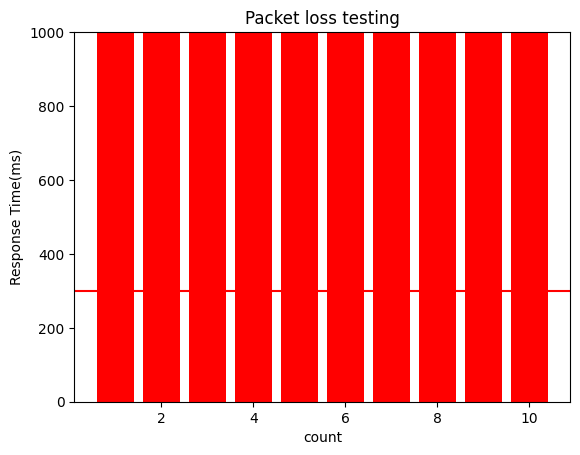


Hostname :  192.168.56.1
Packets sent :  10 packets
Packets received :  0 packets
Packets lost :  10 packets
Packet Loss percentage :  100.0 %
Minumum Response :  All packets sent are lost because minimum response > 1000 ms
Maximum Response :  All packets sent are lost
Average Response :  All packets sent are lost
Connection : Bad connection and high packet loss
Number of Packets that took more than 300 ms :  10
Percentage of Number of Packets that took more than 300 ms :  100.0 %


----------------------------------------------------------------------------------------------------
                               PACKET LOSS TESTING COMPLETED SUCCESSFULLY
----------------------------------------------------------------------------------------------------




In [11]:
import sys
import subprocess
import re
import itertools
import socket
import os
import platform
import traceback
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pip
""" Installing the python modules that are not previously installed """
modules_to_try=['sys','subprocess','re','itertools','socket','os','platform','traceback','matplotlib','pandas','csv','pip']

#installing all packages
def install(package):
    pip.main(['install', package])
    
def install_all_packages(modules_to_try):
    for module in modules_to_try:
        try:
            __import__(module)
        except ImportError as e:
            print(module," not found")
            print()
            print("Installing ",module)
            install(e.name)
install_all_packages(modules_to_try)
""" Heading """
print("\n")
print("-"*100)
print(" "*41,"PACKET LOSS TESTING")
print("-"*100)
print("\n")
""" Getting the directory path """
plat = platform.system()
scriptDir = sys.path[0]

""" Used for Checking the IP address is valid or not """
regex = '''^(25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.(
 25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.(
 25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.(
 25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)$'''

""" Checking the input option """
def ip_option():
    try:
        print("-"*100)
        print("1. To enter website name\n2. To enter IP address")
        print("-"*100)
        print()
        op_wip=int(input("Enter the option : "))
        print()
        if op_wip==0 or op_wip in range(3,99999999999999999999999999999999999999999999):
            print("Please enter value 1 or 2\n")
        else:
            return op_wip
    except:
        print()
        print("Please enter a int value\n")
        
""" Getting the IP address """
def ip_check():
    if op_host==1:
        try:
            print("-"*100)
            print()
            website=str(input("Enter the website name : "))
            print()
            https='https://'
            http='http://'
            www='www.'
            if https in website:
                website=website[8:]
            if http in website:
                website=website[7:]
            if www not in website:
                website=www+website
            h=website.find('/')
            if h!=-1:
                website=website[:h]
            hosts=socket.gethostbyname(website)
            return hosts
        except:
            print()
            print("Unable to get website IP address Please check the website name and try again")
        print()
    elif op_host==2:
        print("-"*100)
        print()
        hosts=input("Enter the IP address : ")
        print()
        if(re.search(regex,hosts)):
            return hosts
        else:
            print("please enter a valid IP address")
    print()
    
""" Checking the input option for count and size """
def cs_option():
    try:
        print("-"*100)
        print(" "*20,"Default values for count is 10 and size is 32")
        print("-"*100)
        print("1. To change default values\n2. To proceed with default values")
        print("-"*100)
        print()
        opcs=int(input("Enter the option : "))
        print()
        if opcs==0 or opcs in range(3,9999):
            print("Please enter value 1 or 2\n")
        else:
            return opcs
    except:
        print()
        print("Please enter a int value\n")
    """ Checking the number of packets """
def cs_checka():
    if op_cs==1:
        try:
            print("-"*100)
            print()
            x=int(input("Enter the count : "))
            print()
            return str(x)
            print()
        except:
            print()
            print("Please enter int value")
            print()
    elif op_cs==2:
        x=10
        return str(x)
    print()
    """ Checking the packet size """
def cs_checkb():
    if op_cs==1:
        try:
            print("-"*100)
            print()
            y=int(input("Enter the size : "))
            print()
            if y in range(0,65501):
                return str(y)
            else:
                print("Enter the packet size in range of 0 and 65500")
                print()
        except:
               print()
               print("Please enter int value")
               print()
    elif op_cs==2:
        y=32
        return str(y)
    print()
 
    """ Checking the input option for saving the results or not """
def save_option():
    try:
        print("-"*100)
        print("1. To save results\n2. If dont want to save results")
        print("-"*100)
        print()
        op_saves=int(input("Enter the option : "))
        print()
        if op_saves==0 or op_saves in range(3,99999999999999999999999999999999999999999999):
            print("Please enter value 1 or 2\n")
        else:
            return op_saves
    except:
        print()
        print("Please enter a int value\n")
    """ optioncheck function that contains a while loop that runs until it gets a valid input """
def optioncheck():
    global hostop
    hostop=None
    while(hostop==None):
        hostop=ip_option()
    return hostop
    """ hostcheck function that contains a while loop that runs until it gets a valid IP address """
def hostcheck():
    global hostsop
    hostsop=None
    while(hostsop==None):
        hostsop=ip_check()
    return hostsop
    """ cs_optioncheck function that contains a while loop that runs until it gets a valid input for choosing default values or changing the default values for count and size"""
def cs_optioncheck():
    global cs_op
    cs_op=None
    while(cs_op==None):
        cs_op=cs_option()
    return cs_op
    """ check_count function that contains a while loop that runs until it gets a valid input for count """
def check_count():
    global count
    count=None
    while(count==None):
        count=cs_checka()
    return count
    """ check_size function that contains a while loop that runs until it gets a valid input for size """
def check_size():
    global size
    size=None
    while(size==None):
        size=cs_checkb()
    return size
    """ check_save function that contains a while loop that runs until it gets a valid input for save """
def check_save():
    global op_pi
    op_pi=None
    while(op_pi==None):
        op_pi=save_option()
    return op_pi
    """ Main function """
def packet_loss_testing():
 
    """ Defining global variables """
    global op_host
    global hosts
    global op_cs
    global a
    global b
    global op_pings
 
    """ Getting values for variables """
 
    high_ping=[]
 
    op_host=optioncheck()
    hosts=hostcheck()
    op_cs=cs_optioncheck()
    a=check_count()
    b=check_size()
    op_save=check_save()
    print("-"*100)
 
    """ Checks the platform is windows or not and runs the ping command that gives the results """
 
    try:
        if plat == "Windows":
            args = ["ping", "-n", a , "-l", b , "-w", "1000", hosts]
        ping = subprocess.Popen(
            args,
            stdout = subprocess.PIPE,
            stderr = subprocess.PIPE
            )
        out, error = ping.communicate()
        results=str(out)
        #print(repr(results))
        """ If all packets sent are lost then we dont get the minimum,maximum and average values """
        #returns the string that matches in the order
        #\d+ used to find the digits 
        try:
            minimum = str(re.findall(r"Minimum = (\d+)", results)[0])
            maximum = str(re.findall(r"Maximum = (\d+)", results)[0])
            average = str(re.findall(r"Average = (\d+)", results)[0])
        except:
            minimum = "All packets sent are lost because minimum response > 1000 ms"
            maximum = "All packets sent are lost"
            average = "All packets sent are lost"
   
        packets_lost = str(re.findall(r"Lost = (\d+)", results)[0])
        packets_sent = str(re.findall(r"Packets: Sent = (\d+)", results)[0])
        packets_received = str(re.findall(r"Received = (\d+)", results)[0])
  
  
        """ Graph """
 
        if os.path.exists('text.txt'):
            os.remove('text.txt')
        if os.path.exists('text.csv'):
            os.remove('text.csv')
 
        results=results.replace("\\r\\n","\n \n")
        x = re.split("\\n ", results)
 
        try:
            if average == "All packets sent are lost":
                with open("text.txt", "w") as file1:
                    file1.writelines(x[1:-4])
            else:
                with open("text.txt", "w") as file1:
                    file1.writelines(x[1:-8])
            left=[]
            for i in range(1,int(count)+1):
                left.append(i)
            with open("text.csv", "w") as csv_file:
                dataping = pd.read_csv("text.txt",sep="=|ms|Pinging|with|bytes|of|data|Request timed out.",engine='python')
                dataping.to_csv('text.csv', index = None)
                dataping.columns=['reply','time','a','ping','b','TTL']
            with open("text.csv", "r") as csv_file:
                csv_reader = csv.reader(csv_file)
                for lines in csv_reader:
                    height=list(dataping.ping)
            for i in range(len(height)):
                if pd.isna(height[i])==True:
                    height[i]=1000
            high_ping=height
            plt.ylim(0, 1000)
            clrs = ['green' if (x != 1000) else 'red' for x in height ]
            plt.bar(left, height,width = 0.8, color = clrs)
            plt.axhline(y=300,color="red")
            plt.xlabel('count')
            plt.ylabel('Response Time(ms)')
            plt.title('Packet loss testing')
            plt.show()
        except:
            print("Graph plotting error ")
 
        Packet_loss_percentage=(100-((int(packets_received)/int(packets_sent))*100))
        count_high_ping=0
        count_high_ping_percentage=0
        for i in range(len(high_ping)):
            if high_ping[i]>=300:
                count_high_ping+=1
                count_high_ping_percentage=round(((count_high_ping/int(count))*100),2)
 
        """ Saving results in ping.txt """
 
        if op_save==1:
            print()
            if os.path.exists('ping.txt'):
                os.remove('ping.txt')
            f = open('ping.txt', 'a')
            f.write("Hostname : " + hosts + "\n")
            f.write("Packets sent : " + packets_sent + " packets" + "\n")
            f.write("Packets received : " + packets_received + " packets" + "\n")
            f.write("Packet Loss : " + packets_lost + " packets" + "\n")

            if minimum == "All packets sent are lost because minimum response > 1000 ms":
                f.write("Minumum Response : " + minimum + "\n")
            else:
                f.write("Minumum Response : " + minimum + "ms" + "\n")
 
            if maximum == "All packets sent are lost":
                f.write("Maximum Response : " + maximum + "\n")
            else:
                f.write("Maximum Response : " + maximum + "ms" + "\n")
 
            if average == "All packets sent are lost":
                f.write("Average Response : " + average + "\n")
            else:
                f.write("Average Response : " + average + "ms" + "\n")

            if Packet_loss_percentage<=1.0:
                f.write("Connection : Excellent connection"+"\n")
            elif Packet_loss_percentage>1.0 and Packet_loss_percentage<=5.0:
                f.write("Connection : Good connection and packet loss may not be noticeable"+"\n")
            elif Packet_loss_percentage>5.0 and Packet_loss_percentage<=10.0:
                f.write("Connection : Good connection and packet loss may be slightly noticeable"+"\n")
            elif Packet_loss_percentage>10.0 and Packet_loss_percentage<=20.0:
                f.write("Connection : Poor connection and packet loss will be noticeable"+"\n")
            elif Packet_loss_percentage>20.0:
                f.write("Connection : Bad connection and high packet loss"+"\n")
            f.write("Number of Packets that took more than 300 ms : "+str(count_high_ping)+"\n")
            f.write("Percentage of Number of Packets that took more than 300 ms : "+str(count_high_ping_percentage)+"%"+"\n")

            f.write("\n")
            f.close()
 
        print("Hostname : ", hosts)
        print("Packets sent : ",packets_sent,"packets")
        print("Packets received : ",packets_received,"packets")
        print("Packets lost : ",packets_lost,"packets")
        print("Packet Loss percentage : ",(100-((int(packets_received)/int(packets_sent))*100)),"%")
 
        if minimum == "All packets sent are lost because minimum response > 1000 ms":
            print("Minumum Response : ", minimum)
        else:
            print("Minumum Response : ", minimum,"ms")
 
        if maximum == "All packets sent are lost":
            print("Maximum Response : ", maximum)
        else:
            print("Maximum Response : ", maximum,"ms")
 
        if average == "All packets sent are lost":
            print("Average Response : ", average)
        else:
            print("Average Response : ", average,"ms")
        if Packet_loss_percentage<=1.0:
            print("Connection : Excellent connection")
        elif Packet_loss_percentage>1.0 and Packet_loss_percentage<=5.0:
            print("Connection : Good connection and packet loss may not be noticeable")
        elif Packet_loss_percentage>5.0 and Packet_loss_percentage<=10.0:
            print("Connection : Good connection and packet loss may be slightly noticeable")
        elif Packet_loss_percentage>10.0 and Packet_loss_percentage<=20.0:
            print("Connection : Poor connection and packet loss will be noticeable")
        elif Packet_loss_percentage>20.0:
            print("Connection : Bad connection and high packet loss")
            print("Number of Packets that took more than 300 ms : ",count_high_ping)
            print("Percentage of Number of Packets that took more than 300 ms : ",count_high_ping_percentage,"%")

    except:
        print('Error processing line: ', hosts)
        print('Error message: ', traceback.format_exc())
packet_loss_testing()
print("\n")
print("-"*100)
print(" "*30,"PACKET LOSS TESTING COMPLETED SUCCESSFULLY")
print("-"*100)
print("\n")